# GeoOptimizer Example

This notebook demonstrates how to use the *nugget*'s GeoOptimizer class for point geometry optimization.

In [4]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Import the GeoOptimizer class
from nugget import GeoOptimizer

## Dynamic String Optimization Example

This example shows how to use the GeoOptimizer to optimize a "continuous string" geometry using the error of reproduced signal functions with RBF interpolation as a loss.

In [5]:
# Create a GeoOptimizer instance
rbf_optimizer = GeoOptimizer(
    dim=3,                      # 3D space
    domain_size=2.0,            # Domain size from -1 to 1
    epsilon=30.0,               # RBF kernel parameter
    # Common optimization parameters
    num_test_points=2000,       # Number of test points
    batch_size=200,             # Batch size for surrogate functions
    learning_rate=0.01,         # Learning rate for optimization
    repulsion_weight=0.0001,    # Weight for point repulsion
    boundary_weight=100.0,      # Weight for boundary penalty
    sampling_weight=0.1,       # Weight for sampling bias
    # String-specific parameters
    string_repulsion_weight=0.0001,  # Weight for string repulsion
    optimize_xy=True,           # Whether to optimize string positions
    xy_learning_rate=0.05,      # Learning rate for string positions
    # Scheduler parameters
    lr_scheduler_type='exp',    # Exponential learning rate decay
    lr_scheduler_params={'gamma': 0.95},
    xy_lr_scheduler_type='exp', # Exponential decay for XY optimizer
    xy_lr_scheduler_params={'gamma': 0.95}
)

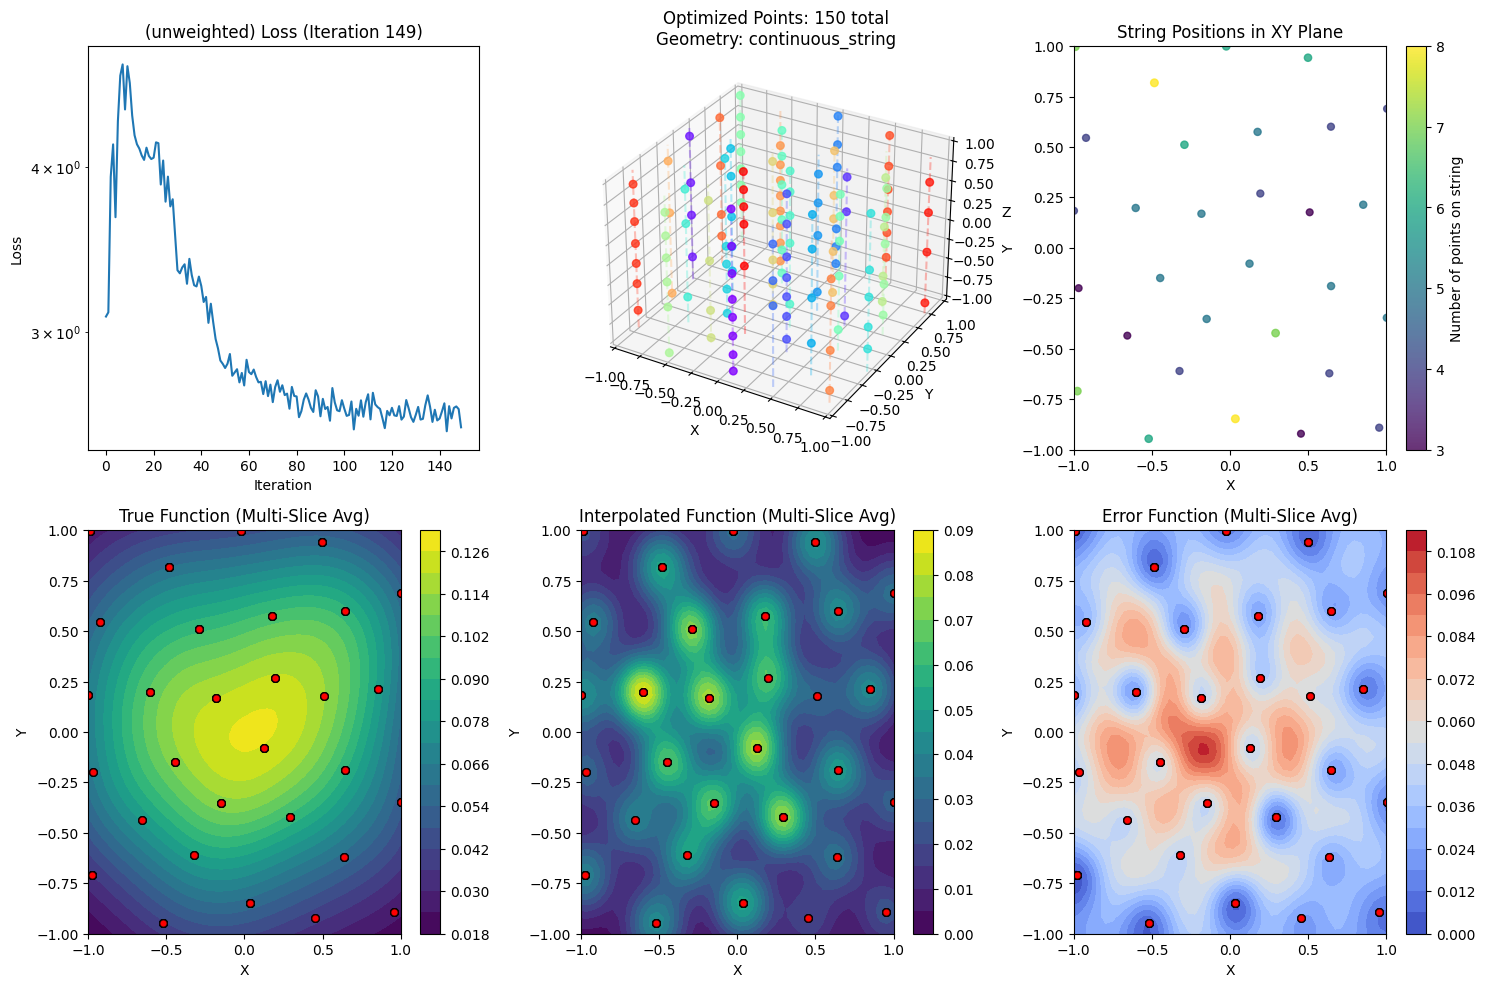

In [7]:
# Run the optimization using dynamic strings and RBF interpolation loss
rbf_results = rbf_optimizer.optimize(
    geometry_type='continuous_string',   # Use dynamic string geometry
    loss_type='rbf',                 # Use RBF interpolation loss
    
    # Geometric configuration
    n_strings=30,                    # Number of strings
    total_points=150,                # Total number of points
    optimize_positions_only=False,    # Optimize both positions and distributions
    even_distribution=True,          # Keep even distribution of points on each string
    
    # Optimization parameters
    num_iterations=150,              # Number of iterations
    visualize_every=10,              # Visualization frequency
    num_test_funcs=None,             # Number of test functions to generate
    path_repulsion_weight=0.0,    # Weight for path repulsion
    # Training strategy
    alternating_training=True,       # Use alternating training strategy
    alternating_steps=10,            # Switch between optimizations every 10 steps
    
    # Additional parameters
    decay_sampling=False,            # Don't decay the sampling weight
    multi_slice=True, # Don't use multiple slices for visualization
    plot_types=["uw_loss", "3d_points", "string_xy",'true_function', 'interp_function', 'error_function'],
    make_gif=True,             # Create a GIF of the optimization process
    gif_plot_selection=["uw_loss","string_xy", "3d_points", 'true_function', 'interp_function', 'error_function'], # Select the first three plots for the GIF
    gif_fps=10,             # Frames per second for the GIF
    gif_filename='rbf_cs_optimization.gif',  # Output filename for the GIF
)

## Visualize the optimized geometry with an interactive 3D plot

In [ ]:
# Create an interactive 3D plot if plotly is available
fig = rbf_optimizer.create_interactive_plot(
    points=rbf_results['points'],
    string_indices=rbf_results['string_indices'],
    points_per_string_list=rbf_results['points_per_string_list'],
    string_xy=rbf_results['string_xy']
)

# Display the figure
fig

## SNR Optimization Example

This example demonstrates how to use GeoOptimizer for signal-to-noise ratio optimization with the 'dynamic string' geometry. We first optimize with a uniform background and then run the optimizer again with background with the non-background optimized points as a starting geometry.

In [12]:
# Create a GeoOptimizer instance for SNR optimization
no_bkg_snr_optimizer = GeoOptimizer(
    dim=3,                       # 3D space
    domain_size=2.0,             # Domain size from -1 to 1
    epsilon=30.0,                # RBF kernel parameter
    # Common optimization parameters
    batch_size=2,                # Small batch size for SNR optimization
    learning_rate=0.01,          # Learning rate for optimization
    repulsion_weight=0.00002,        # Weight for point repulsion
    boundary_weight=1e3,# Weight for boundary penalty, # Weight for path repulsion
    # String-specific parameters
    string_repulsion_weight=0.00003, # Weight for string repulsion
    optimize_xy=True,            # Whether to optimize string positions
    xy_learning_rate=0.05,       # Learning rate for string positions
    # SNR-specific parameters
    signal_scale=1.0,            # Scale factor for signal functions
    background_scale=10.0,       # Scale factor for background functions
    snr_weight=0.08,              # Weight for SNR loss term
    no_background=True,          # No background functions
    # lr_scheduler_type='exp',    # Exponential learning rate decay
    # lr_scheduler_params={'gamma': 0.95},
    # xy_lr_scheduler_type='exp', # Exponential decay for XY optimizer
    # xy_lr_scheduler_params={'gamma': 0.95}
)

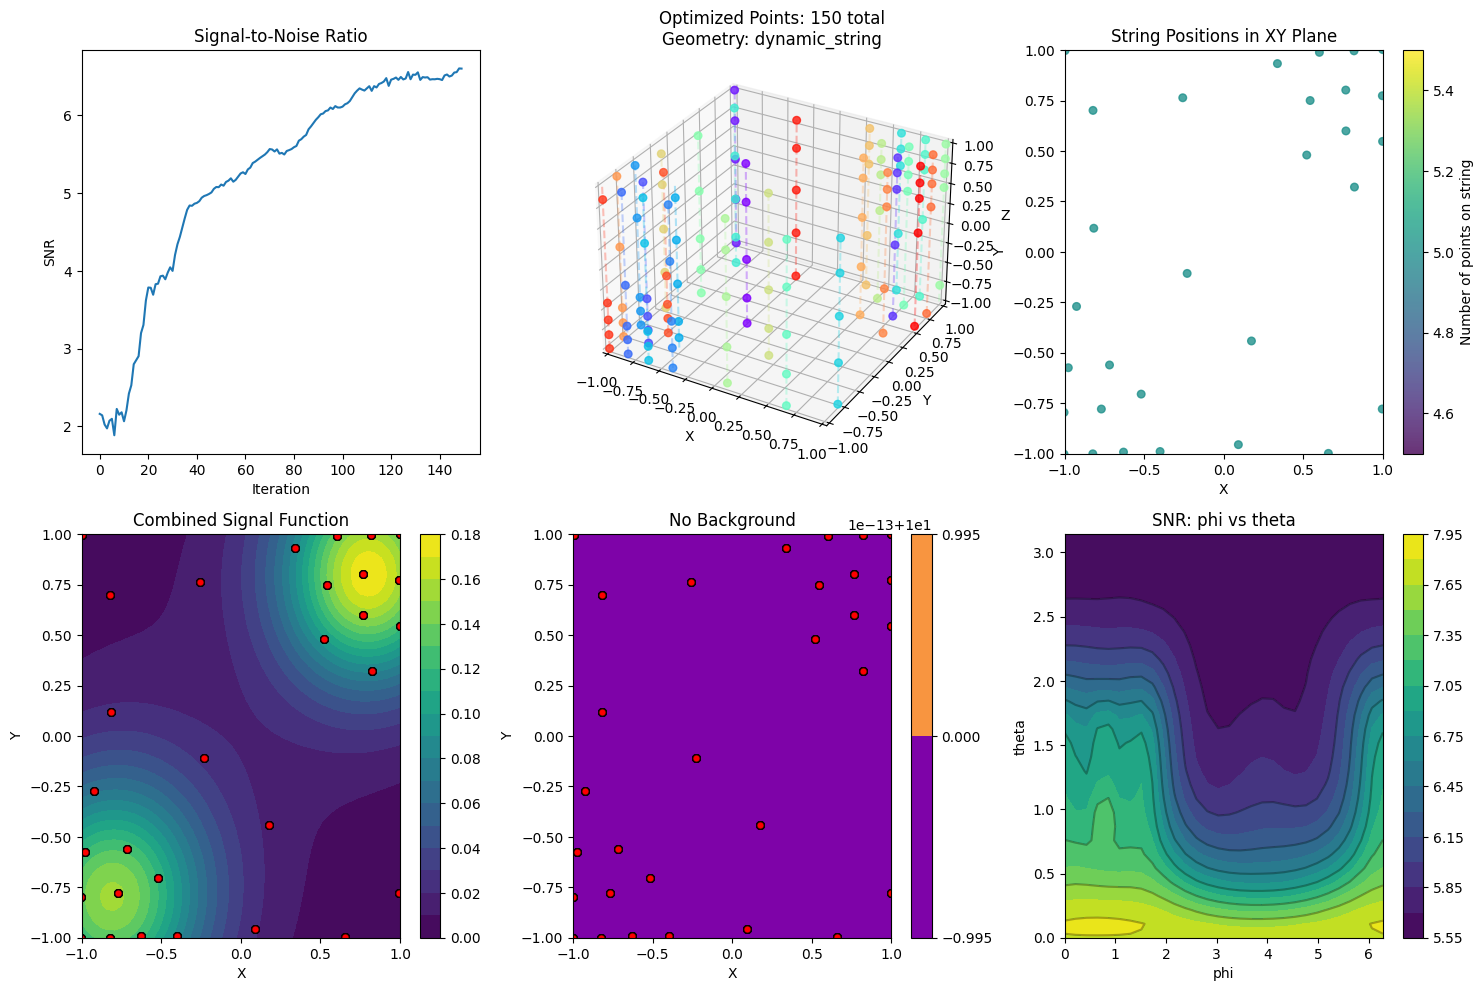

In [13]:
# Run the optimization using dynamic strings and SNR loss
no_bkg_snr_results = no_bkg_snr_optimizer.optimize(
    geometry_type='dynamic_string',   # Use dynamic string geometry
    loss_type='snr',                 # Use SNR loss function
    
    # Geometric configuration
    n_strings=30,                    # Number of strings
    total_points=150,                # Total number of points
    optimize_positions_only=False,    # Optimize only positions, not distributions
    even_distribution=True, # Start with even distribution of points
    
    # Optimization parameters
    num_iterations=150,              # Number of iterations
    visualize_every=10,              # Visualization frequency
    multi_slice=True,                # Use multiple slices for visualization
    batch_size=2,                    # Small batch size for SNR optimization
    path_repulsion_weight=0.0, # Weight for path repulsion
    # Training strategy
    alternating_training=True,       # Use alternating training strategy
    alternating_steps=10,            # Switch between optimizations every 10 steps
    
    # SNR-specific parameters
    optimize_params=['phi', 'theta'],  # Parameters to optimize over
    num_background_funcs=4,            # Number of background functions
    param_grid_size=30,                # Size of parameter grid
    show_all_signals=False,              # Visualize all signals combined
    
    # Keep certain parameters constant
    keep_param_const={
        'x': [-0.8, 0.8],              # Constrain x position
        'y': [-0.8, 0.8],              # Constrain y position
        'z': [-0.8, 0.8]               # Constrain z position
    },
    
    # Additional parameters
    rand_params_in_grid=False,          # Randomly sample from parameter grid
    plot_types=["snr_history","3d_points", "string_xy", "signal_contour", "background_contour",  "parameter_2d"],# Use background functions
    make_gif=True,             # Create a GIF of the optimization process
    gif_plot_selection=["snr_history", "3d_points", "string_xy", "signal_contour",'background_contour', "parameter_2d"], # Select the first three plots for the GIF
    gif_fps=7,             # Frames per second for the GIF
    gif_filename='no_bkg_snr_cs_optimization.gif'  # Filename for the GIF
)

In [14]:
# Create a GeoOptimizer instance for SNR optimization
bkg_snr_optimizer = GeoOptimizer(
    dim=3,                       # 3D space
    domain_size=2.0,             # Domain size from -1 to 1
    epsilon=30.0,                # RBF kernel parameter
    # Common optimization parameters
    batch_size=2,                # Small batch size for SNR optimization
    learning_rate=0.01,          # Learning rate for optimization
    repulsion_weight=0.00002,        # Weight for point repulsion
    boundary_weight=1e3,# Weight for boundary penalty, # Weight for path repulsion
    # String-specific parameters
    string_repulsion_weight=0.00003, # Weight for string repulsion
    optimize_xy=True,            # Whether to optimize string positions
    xy_learning_rate=0.05,       # Learning rate for string positions
    # SNR-specific parameters
    signal_scale=1.0,            # Scale factor for signal functions
    background_scale=10.0,       # Scale factor for background functions
    snr_weight=0.08,              # Weight for SNR loss term
    no_background=False,          # No background functions
    # lr_scheduler_type='exp',    # Exponential learning rate decay
    # lr_scheduler_params={'gamma': 0.95},
    # xy_lr_scheduler_type='exp', # Exponential decay for XY optimizer
    # xy_lr_scheduler_params={'gamma': 0.95}
)

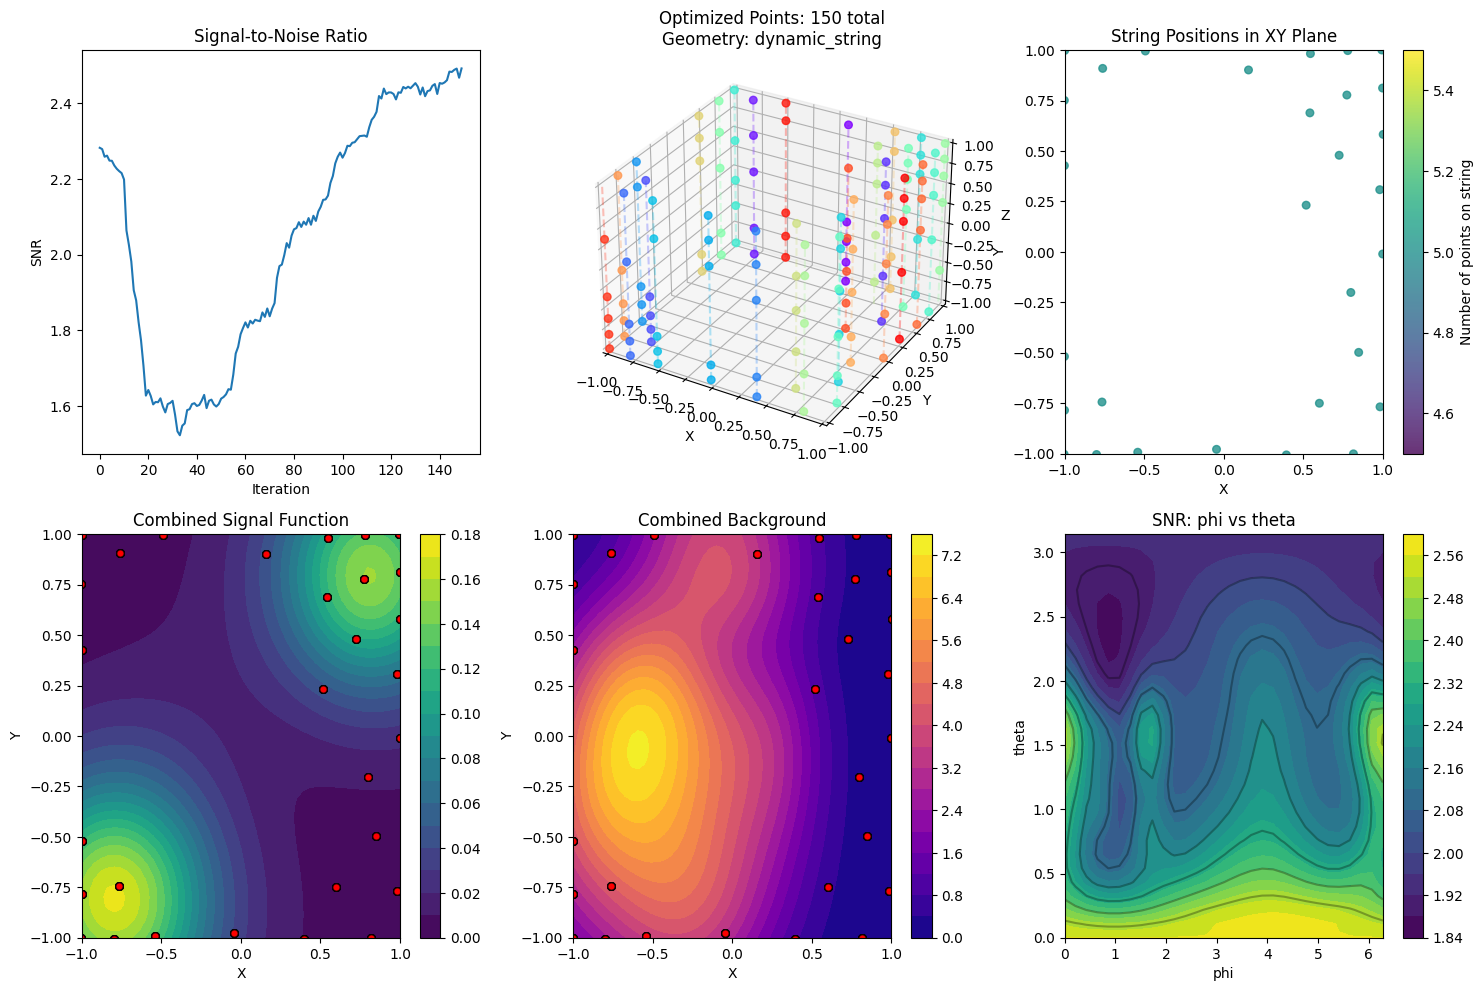

In [19]:
# Run the optimization using dynamic strings and SNR loss
bkg_snr_results = bkg_snr_optimizer.optimize(
    geometry_type='dynamic_string',   # Use dynamic string geometry
    loss_type='snr',                 # Use SNR loss function
    initial_geometry_dict=no_bkg_snr_optimizer.clone().geom_dict, # Use the geometry from the previous optimization with new clone method
    # Geometric configuration
    n_strings=30,                    # Number of strings
    total_points=150,                # Total number of points
    optimize_positions_only=False,    # Optimize only positions, not distributions
    even_distribution=True, # Start with even distribution of points
    
    # Optimization parameters
    num_iterations=150,              # Number of iterations
    visualize_every=10,              # Visualization frequency
    multi_slice=True,                # Use multiple slices for visualization
    batch_size=2,                    # Small batch size for SNR optimization
    path_repulsion_weight=0.0, # Weight for path repulsion
    # Training strategy
    alternating_training=True,       # Use alternating training strategy
    alternating_steps=10,            # Switch between optimizations every 10 steps
    
    # SNR-specific parameters
    optimize_params=['phi', 'theta'],  # Parameters to optimize over
    num_background_funcs=4,            # Number of background functions
    param_grid_size=30,                # Size of parameter grid
    show_all_signals=False,              # Visualize all signals combined
    
    # Keep certain parameters constant
    keep_param_const={
        'x': [-0.8, 0.8],              # Constrain x position
        'y': [-0.8, 0.8],              # Constrain y position
        'z': [-0.8, 0.8]               # Constrain z position
    },
    
    # Additional parameters
    rand_params_in_grid=False,          # Randomly sample from parameter grid
    plot_types=["snr_history","3d_points", "string_xy", "signal_contour", "background_contour",  "parameter_2d"],# Use background functions
    make_gif=True,             # Create a GIF of the optimization process
    gif_plot_selection=["snr_history", "3d_points", "string_xy", "signal_contour",'background_contour', "parameter_2d"], # Select the first three plots for the GIF
    gif_fps=7,             # Frames per second for the GIF
    gif_filename='bkg_snr_cs_optimization.gif'  # Filename for the GIF
    
)